# Kepler challenge
## evaluation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
def _convert_p_values(p_0, p_1, epsilon):
    """converting the p-values from TCP into the approprate prediction given the value of epsilon
    for two classes this equates to four possible predcted classes
    either negative, positive, both or neither."""
    # epsilon = e.g. 0.2 for 80% significance level
    # Interpret the conformal p-values
    is_0 = p_0 > epsilon
    is_1 = p_1 > epsilon
    if is_0 and not is_1:
        return 0
    elif not is_0 and is_1:
        return 1
    elif is_0 and is_1:
        # classified as both
        return 0.5
    else:
        # classified as neither
        return -1

def print_confusion_matrix(res_mat, eps):
    """prints the TCP equivalent of a confusion matrix
    hence with two true classes there will be four predicted classes"""
    sig_level = (1 - eps) * 100 
    pred = np.zeros(n_test)
    for i in range(n_test):
        pred[i] = _convert_p_values(res_mat[i, 0], res_mat[i, 1], eps)
        
    print('  ')
    confusion_mat = np.zeros((2,4))
    confusion_mat[0, 0] = len(np.where(pred[5:]==0)[0])
    confusion_mat[0, 1] = len(np.where(pred[5:]==1)[0])
    confusion_mat[0, 2] = len(np.where(pred[5:]==0.5)[0])
    confusion_mat[0, 3] = len(np.where(pred[5:]==-1)[0])
    confusion_mat[1, 0] = len(np.where(pred[:5]==0)[0])
    confusion_mat[1, 1] = len(np.where(pred[:5]==1)[0])
    confusion_mat[1, 2] = len(np.where(pred[:5]==0.5)[0])
    confusion_mat[1, 3] = len(np.where(pred[:5]==-1)[0])
    col_names = ['nonexo', 'exo', 'both', 'neither']
    CM  = pd.DataFrame(np.int64(confusion_mat), columns = col_names, index=['nonexo','exo'])
    print('confusion matrix, significance level = %s'%(int(sig_level)),'%')
    print('  ')
    print(CM)
    print('  ')

## summary level results
below I read in the results from running the TCP algorithm 100 times and compute the median p-value across those 100 draws and I plot those median p-values for the 5 test stars (out of 570 test stars) that had confirmed exoplanets. The red dots correspond to the p-values for the nonexoplanet prediction and the green dots for the exoplanet=True prediction.

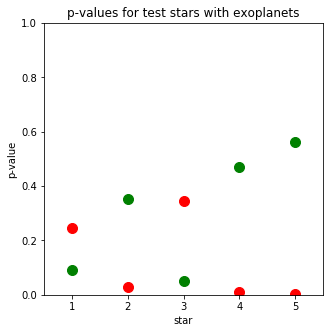

In [3]:
y_test = pd.read_csv('y_test.csv', index_col=0)
res = np.load('res.npy')
n_draws = res.shape[0]
n_test = res.shape[1]
res_median = np.zeros((n_test, 2))
for i in range(n_test):
    res_median[i, 0] = np.median(res[:, i, 0])
    res_median[i, 1] = np.median(res[:, i, 1])

fig = plt.figure(facecolor='w',figsize=(5,5))
ax = fig.add_subplot(111)
ax.scatter(np.arange(1, n_test + 1), res_median[:, 0], color='r', s=100)
ax.scatter(np.arange(1, n_test + 1), res_median[:, 1], color='g', s=100)
ax.set_ylim(0, 1)
ax.set_xlim(0.5, 5.5)
plt.title('p-values for test stars with exoplanets')
plt.ylabel('p-value')
plt.xlabel('star')
plt.show()
plt.close()

## confusion matrices
confusion matrices for two different significance levels. At both the 95% and 80% significance level we correctly classify 3/5 of the planets that actually had exoplanets. If we take an 80% significance level we do quite well with the nonexoplanet stars, but at a more stringent significance level we can see that a significant proportion of these become somewhat difficult to correctly classify.

In [4]:
print_confusion_matrix(res_mat=res_median, eps=0.2)
print_confusion_matrix(res_mat=res_median, eps=0.05)

  
confusion matrix, significance level = 80 %
  
        nonexo  exo  both  neither
nonexo     495   12     0       58
exo          2    3     0        0
  
  
confusion matrix, significance level = 95 %
  
        nonexo  exo  both  neither
nonexo     379    8   178        0
exo          0    3     2        0
  
